# Imports

In [82]:
# Python 3.8, Tensorflow 2.2
from numpy.random import seed
seed(888)
import tensorflow
tensorflow.random.set_seed(404)

import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard

from time import strftime

from IPython.display import display
from keras.preprocessing.image import array_to_img

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import itertools

%matplotlib inline

# Constants

In [74]:
LABEL_NAMES = ["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
IMAGE_WIDTH = 32
IMAGE_HEIGHT =32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000
NR_CLASSES = 10

LOG_DIR = "tensorboard_cifar_logs/"

# Fetch Data

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [5]:
print(type(cifar10))
print(type(x_train_all))

<class 'module'>
<class 'numpy.ndarray'>


# Explore data

In [6]:
#print(x_train_all[0])

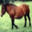

In [7]:
pic = array_to_img(x_train_all[7])
display(pic)

In [8]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

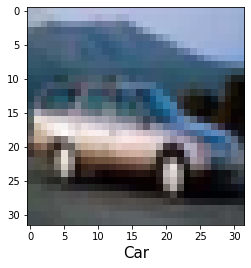

In [9]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize = 15)
plt.show()

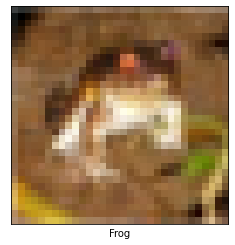

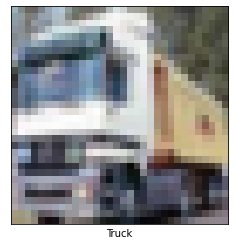

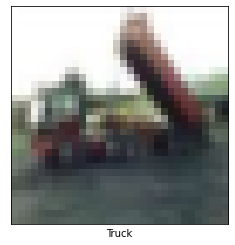

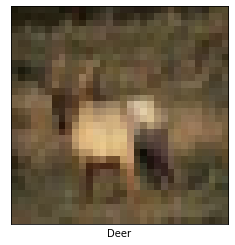

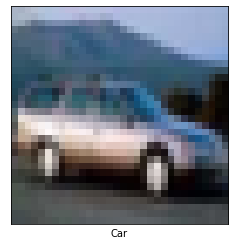

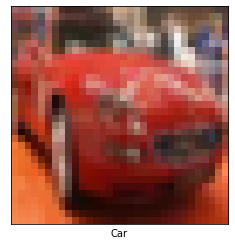

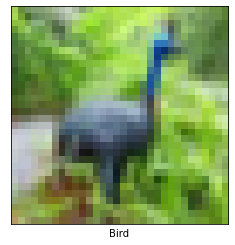

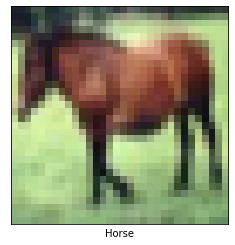

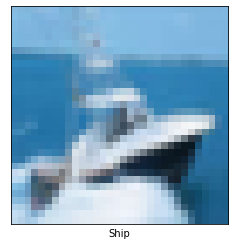

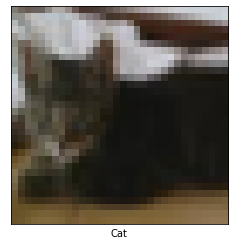

In [10]:
#plt.figure(figsize = (5, 5))
for i in range(0, 10):
    #plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(x_train_all[i])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize = 10)
    plt.show()

In [11]:
nr_images, x, y, c = x_train_all.shape
print(f"number of images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}")

number of images = 50000 	| width = 32 	| height = 32 	| channels = 3


# Preprocess Data

In [12]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [13]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0
type(x_train_all[0][0][0][0])

numpy.float64

In [14]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)
x_train_all.shape

(50000, 3072)

In [15]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
x_test.shape

(10000, 3072)

## Create Validation Dataset

In [16]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
y_val.shape

(10000, 1)

## Create Training Dataset

In [17]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
y_train.shape

(40000, 1)

## Create a smaller dataset to start with (then move to the full dataset)

In [18]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]
y_train_xs.shape

(1000, 1)

# Define => Compile => Fit

## Define and Compile Nerual Networks using Keras

In [30]:
# Model 1 (Naive)
model_1 = Sequential([
    Dense(units = 128, input_dim = TOTAL_INPUTS, activation = "relu", name = "m1_hidden1"),
    Dense(units = 64, activation = "relu", name = "m1_hidden2"),
    Dense(16, activation = "relu", name = "m1_hidden3"),
    Dense(10, activation = "softmax", name = "m1_output")
])

model_1.compile(optimizer = "adam",
                loss = "sparse_categorical_crossentropy",
                metrics = ["accuracy"])

In [31]:
# Model 2 (Dropout at input)
model_2 = Sequential()
model_2.add(Dropout(0.2, seed = 42, input_shape = (TOTAL_INPUTS,)))
model_2.add(Dense(128, activation = "relu", name = "m2_hidden1"))
model_2.add(Dense(64, activation = "relu", name = "m2_hidden2"))
model_2.add(Dense(16, activation = "relu", name = "m2_hidden3"))
model_2.add(Dense(10, activation = "softmax", name = "m2_output"))

model_2.compile(optimizer = "adam",
                loss = "sparse_categorical_crossentropy",
                metrics = ["accuracy"])

In [32]:
# Model 3 (Dropout at input and first hidden layer)
model_3 = Sequential()
model_3.add(Dropout(0.2, seed = 42, input_shape = (TOTAL_INPUTS,)))
model_3.add(Dense(128, activation = "relu", name = "m3_hidden1"))
model_3.add(Dropout(0.25, seed = 42))
model_3.add(Dense(64, activation = "relu", name = "m3_hidden2"))
model_3.add(Dense(16, activation = "relu", name = "m3_hidden3"))
model_3.add(Dense(10, activation = "softmax", name = "m3_output"))

model_3.compile(optimizer = "adam",
                loss = "sparse_categorical_crossentropy",
                metrics = ["accuracy"])

In [22]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [23]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [24]:
print("Hidden 1: input * units(activations) + units(bias) = ", 32*32*3*128 + 128)
print("Hidden 2: hidden1 * units(activations) + units(bias) = ", 128*64 + 64)
print("Hidden 3: hidden2 * units(activations) + units(bias) = ", 64*16 + 16)
print("Output:   hidden3 * units(activations) + units(bias) = ", 16*10 + 10)

Hidden 1: input * units(activations) + units(bias) =  393344
Hidden 2: hidden1 * units(activations) + units(bias) =  8256
Hidden 3: hidden2 * units(activations) + units(bias) =  1040
Output:   hidden3 * units(activations) + units(bias) =  170


## Tensorboard: visualize the learning process

In [25]:
def get_tensorboard(model_name):
    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print("Dicrectory successfully created!")

    return TensorBoard(log_dir = dir_paths)

## Fit the model using Keras

In [26]:
samples_per_batch = 10000

### Try the small dataset first with 3 different models

In [27]:
%%time
nr_epochs = 200
# Try the small dataset first.
# To start from scratch, re-run the model compile cell before fitting.
# Otherwise the model will continue with where it left off from the previous run.
model_1.fit(x_train_xs, y_train_xs, 
            batch_size = samples_per_batch,
            epochs = nr_epochs,
            callbacks = [get_tensorboard("Model 1")],
            verbose = 0,
            validation_data = (x_val, y_val))

Dicrectory successfully created!
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Wall time: 24.6 s


In [28]:
%%time
nr_epochs = 200
# Try the small dataset first.
# To start from scratch, re-run the model compile cell before fitting.
# Otherwise the model will continue with where it left off from the previous run.
model_2.fit(x_train_xs, y_train_xs, 
            batch_size = samples_per_batch,
            epochs = nr_epochs,
            callbacks = [get_tensorboard("Model 2")],
            verbose = 0,
            validation_data = (x_val, y_val))

Dicrectory successfully created!
Wall time: 33.6 s


In [29]:
%%time
nr_epochs = 200
# Try the small dataset first.
# To start from scratch, re-run the model compile cell before fitting.
# Otherwise the model will continue with where it left off from the previous run.
model_3.fit(x_train_xs, y_train_xs, 
            batch_size = samples_per_batch,
            epochs = nr_epochs,
            callbacks = [get_tensorboard("Model 3")],
            verbose = 0,
            validation_data = (x_val, y_val))

Dicrectory successfully created!
Wall time: 38.8 s


### Now try the complete dataset with 3 different models

In [33]:
%%time
nr_epochs = 100
# To start from scratch, re-run the model compile cell before fitting.
# Otherwise the model will continue with where it left off from the previous run.
model_1.fit(x_train, y_train, 
            batch_size = samples_per_batch,
            epochs = nr_epochs,
            callbacks = [get_tensorboard("Model 1")],
            verbose = 0,
            validation_data = (x_val, y_val))

Dicrectory successfully created!
Wall time: 1min 23s


In [34]:
%%time
nr_epochs = 100
# To start from scratch, re-run the model compile cell before fitting.
# Otherwise the model will continue with where it left off from the previous run.
model_2.fit(x_train, y_train, 
            batch_size = samples_per_batch,
            epochs = nr_epochs,
            callbacks = [get_tensorboard("Model 2")],
            verbose = 0,
            validation_data = (x_val, y_val))

Dicrectory successfully created!
Wall time: 3min 17s


In [35]:
%%time
nr_epochs = 100
# To start from scratch, re-run the model compile cell before fitting.
# Otherwise the model will continue with where it left off from the previous run.
model_3.fit(x_train, y_train, 
            batch_size = samples_per_batch,
            epochs = nr_epochs,
            callbacks = [get_tensorboard("Model 3")],
            verbose = 0,
            validation_data = (x_val, y_val))

Dicrectory successfully created!
Wall time: 3min 9s


# Make predictions on individual images

In [36]:
x_val[0].shape

(3072,)

In [38]:
test = np.expand_dims(x_val[0], axis = 0)

(1, 3072)

In [40]:
np.set_printoptions(precision = 3)
model_2.predict(test)

array([[0.01 , 0.011, 0.136, 0.088, 0.206, 0.083, 0.412, 0.048, 0.001,
        0.006]], dtype=float32)

In [41]:
model_2.predict(x_val)

array([[0.01 , 0.011, 0.136, ..., 0.048, 0.001, 0.006],
       [0.011, 0.527, 0.002, ..., 0.005, 0.194, 0.221],
       [0.019, 0.148, 0.001, ..., 0.016, 0.065, 0.725],
       ...,
       [0.02 , 0.189, 0.01 , ..., 0.064, 0.214, 0.397],
       [0.036, 0.453, 0.017, ..., 0.022, 0.05 , 0.114],
       [0.004, 0.003, 0.115, ..., 0.276, 0.002, 0.006]], dtype=float32)

In [43]:
model_2.predict_classes(test) == y_val[0]

array([ True])

In [48]:
for i in range(0, 10):
    sample = np.expand_dims(x_val[i], axis = 0)
    print(model_2.predict_classes(sample) == y_val[i])

[ True]
[False]
[ True]
[False]
[False]
[False]
[False]
[ True]
[False]
[False]


# Evaluation

In [100]:
model_3.metrics_names

['loss', 'accuracy']

In [101]:
test_loss, test_accuracy = model_3.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3}, test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 0s 1ms/step - loss: 1.5449 - accuracy: 0.4506
Test loss is 1.54, test accuracy is 45.1%


### Confusion matrix

In [102]:
predictions =  model_3.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = predictions)

In [103]:
conf_matrix

array([[466,  24,  78,  32,  29,  12,  25,  30, 258,  46],
       [ 36, 478,  10,  30,  14,  33,  29,  29, 154, 187],
       [102,  11, 285, 100, 172,  52, 143,  66,  53,  16],
       [ 26,  16, 112, 302,  63, 153, 170,  56,  53,  49],
       [ 65,   9, 162,  64, 393,  24, 159,  69,  34,  21],
       [ 16,   7, 123, 185,  78, 303, 139,  73,  53,  23],
       [  6,  11,  92,  85, 141,  32, 582,  22,  14,  15],
       [ 53,   8,  78,  73, 111,  63,  50, 464,  33,  67],
       [ 73,  53,  11,  35,  18,  16,   9,  12, 706,  67],
       [ 47, 131,   9,  46,  17,  14,  34,  43, 132, 527]], dtype=int64)

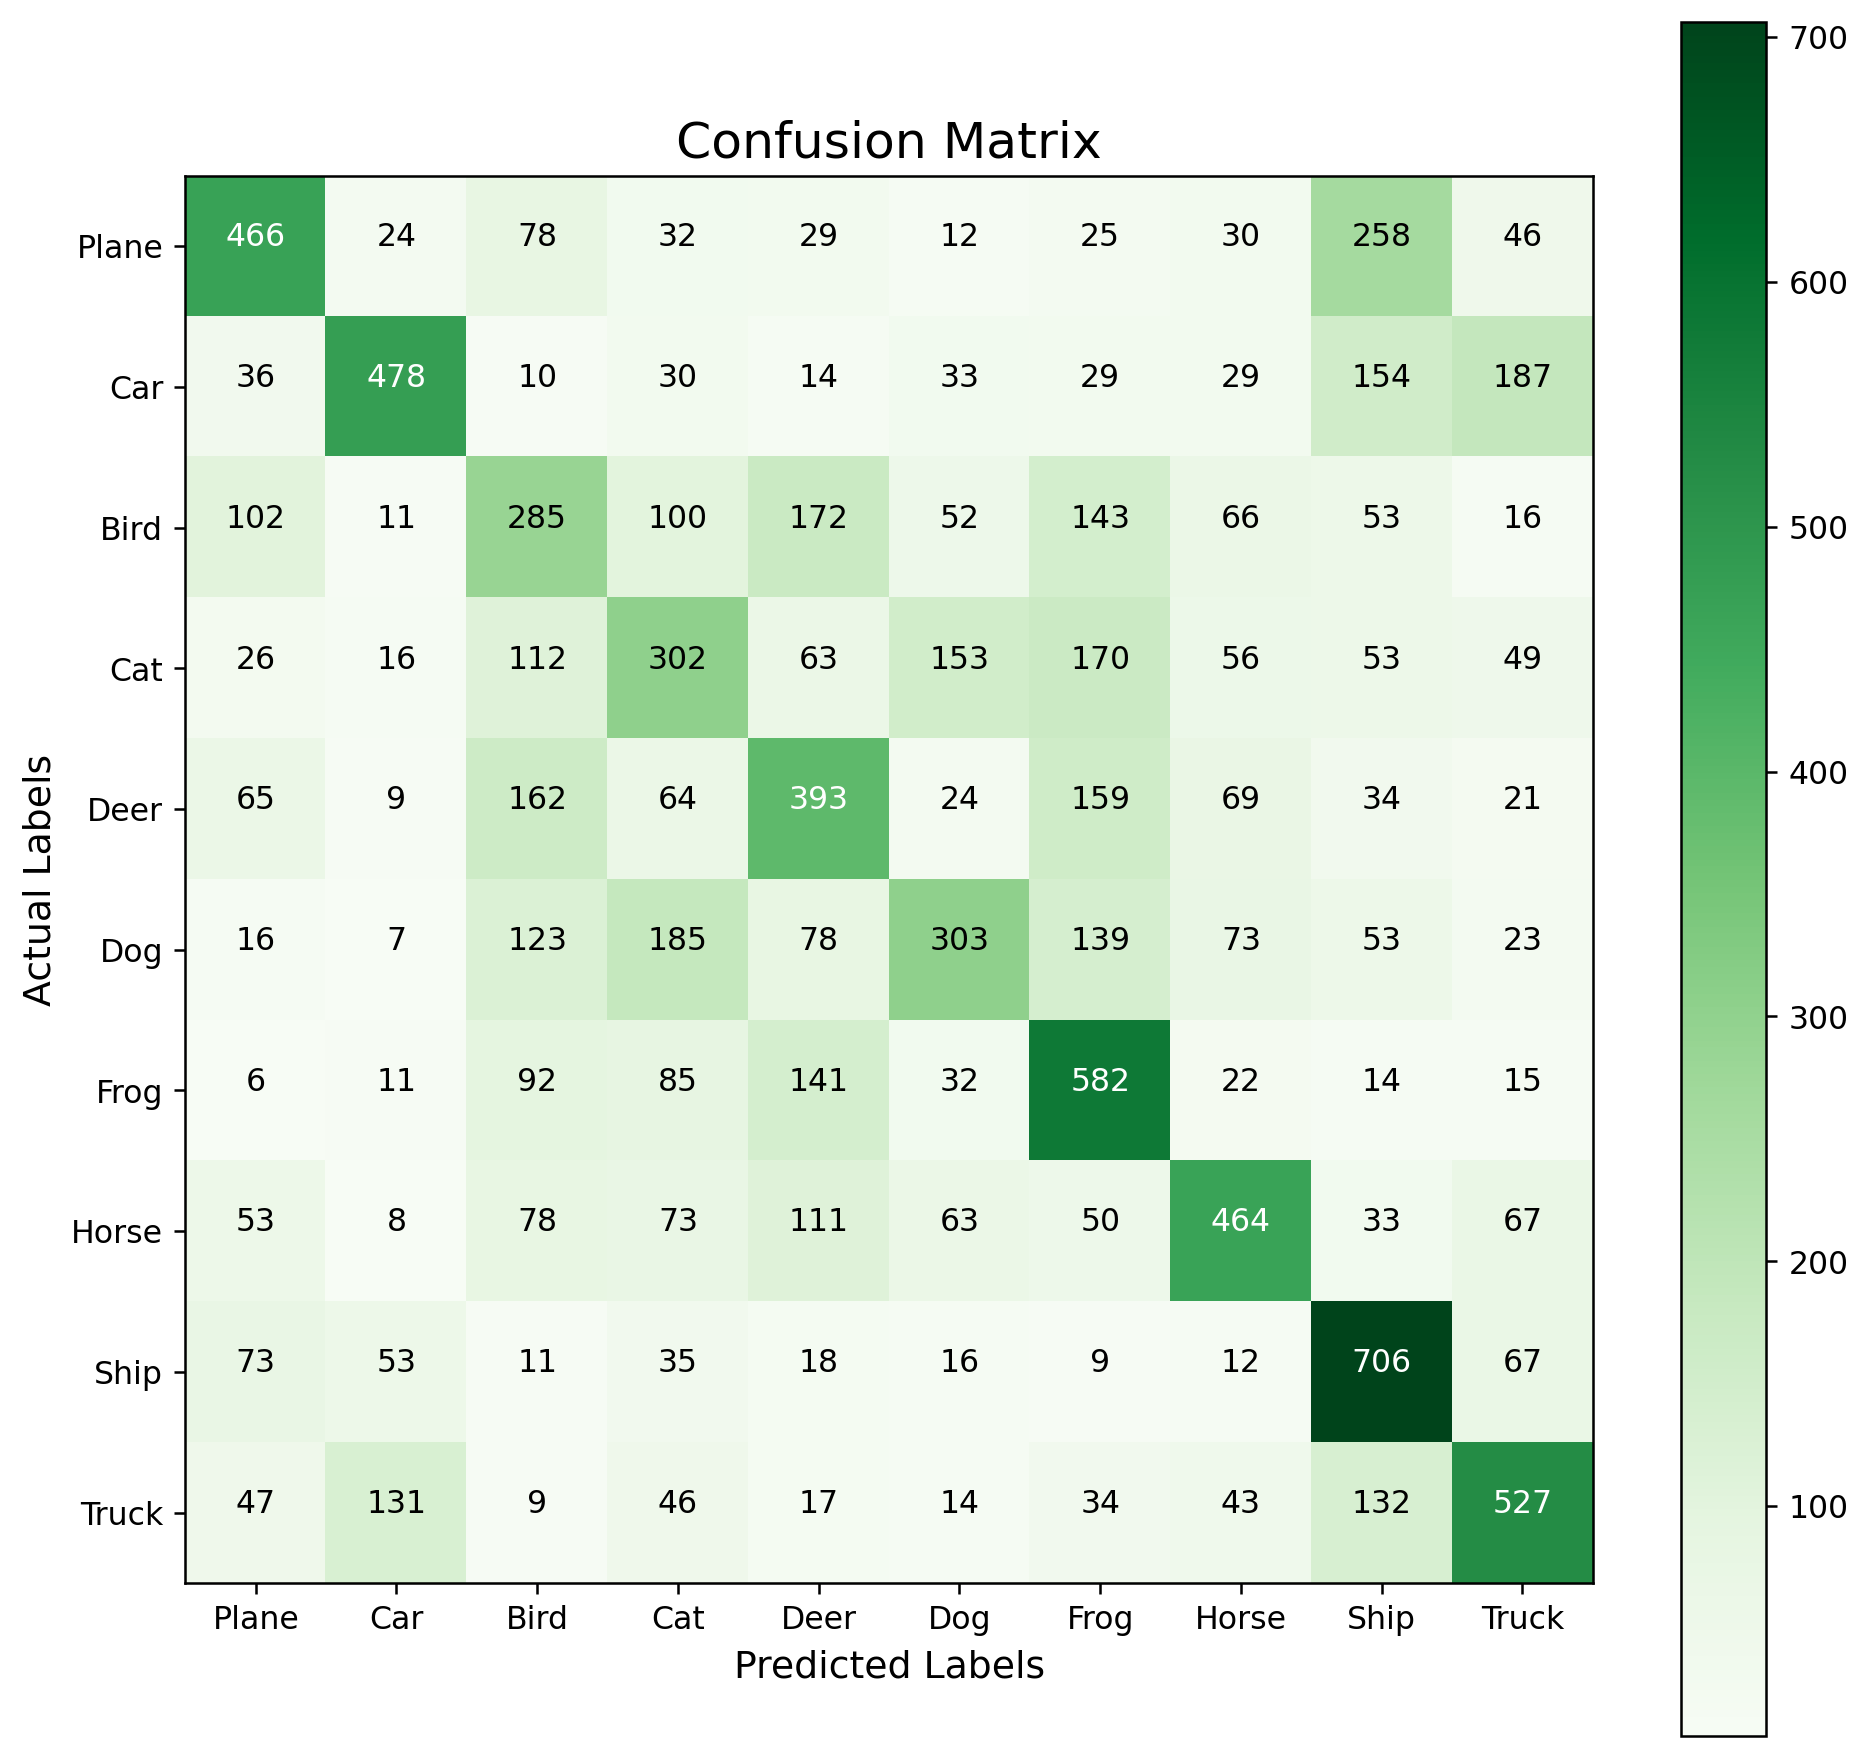

706
6


In [104]:
plt.figure(figsize = (10, 10), dpi = 227)
plt.imshow(conf_matrix, cmap = plt.cm.Greens)
plt.title("Confusion Matrix", fontsize = 16)
plt.ylabel("Actual Labels", fontsize = 12)
plt.xlabel("Predicted Labels", fontsize = 12)
tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)
plt.colorbar()

for i, j in itertools.product(range(10), range(10)):
    plt.text(j, i, conf_matrix[i][j], horizontalalignment = "center",
             color = "white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()
print(conf_matrix.max())
print(conf_matrix.min())

In [106]:
# True positives
print("True Positives:", np.diag(conf_matrix))
# Recall
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 1)
print("Recall:", recall)
# Precision
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 0)
print("Precision:",precision)
# Average recall
avg_recall = np.mean(recall)
print("Average Recall:",avg_recall)
# Average precision
avg_precision = np.mean(precision)
print("Average Precision:",avg_precision)
# F score
f_1 = 2 * avg_precision * avg_recall / (avg_precision + avg_recall)
print("F1 Score:",f_1)

True Positives: [466 478 285 302 393 303 582 464 706 527]
Recall: [0.466 0.478 0.285 0.302 0.393 0.303 0.582 0.464 0.706 0.527]
Precision: [0.524 0.639 0.297 0.317 0.379 0.432 0.434 0.537 0.474 0.518]
Average Recall: 0.45059999999999995
Average Precision: 0.45505750179787763
F1 Score: 0.45281778134243494
